In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

In [2]:
df_train = pd.read_csv('/case/train.csv')
df_test = pd.read_csv('/case/test.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df_train.shape)
print("*"*15)
print(df_test.shape)

(1460, 81)
***************
(1459, 80)


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Distribution of SalePrice

C:\Users\burak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.882876
Kurtosis: 6.536282


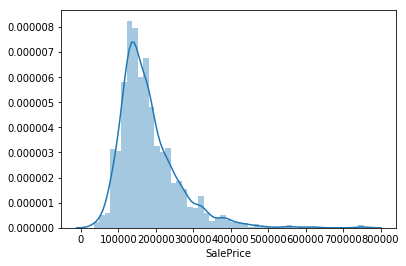

In [5]:
sns.distplot(df_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [6]:
# Log transformation for distribution looks normal
#df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

#sns.distplot(df_train['SalePrice_Log']);
# skewness and kurtosis
#print("Skewness: %f" % df_train['SalePrice_Log'].skew())
#print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

In [7]:
#SalePrice = df_train['SalePrice_Log']


In [8]:
#df_train.drop('SalePrice_Log')

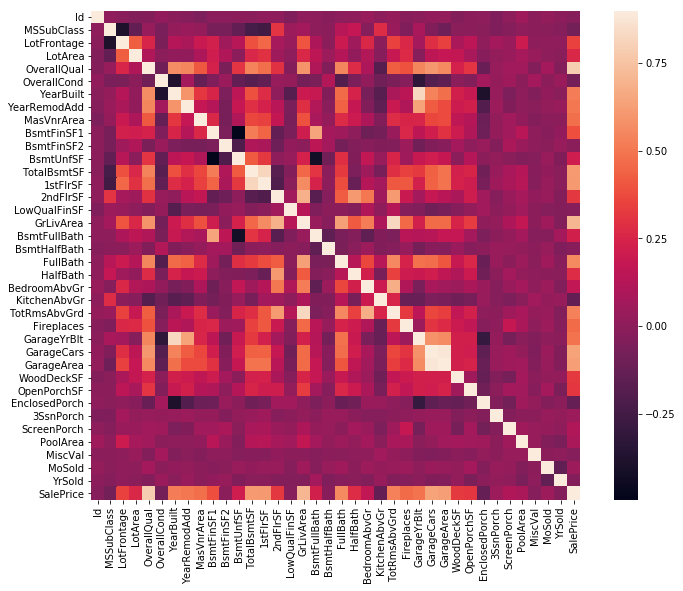

In [9]:
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

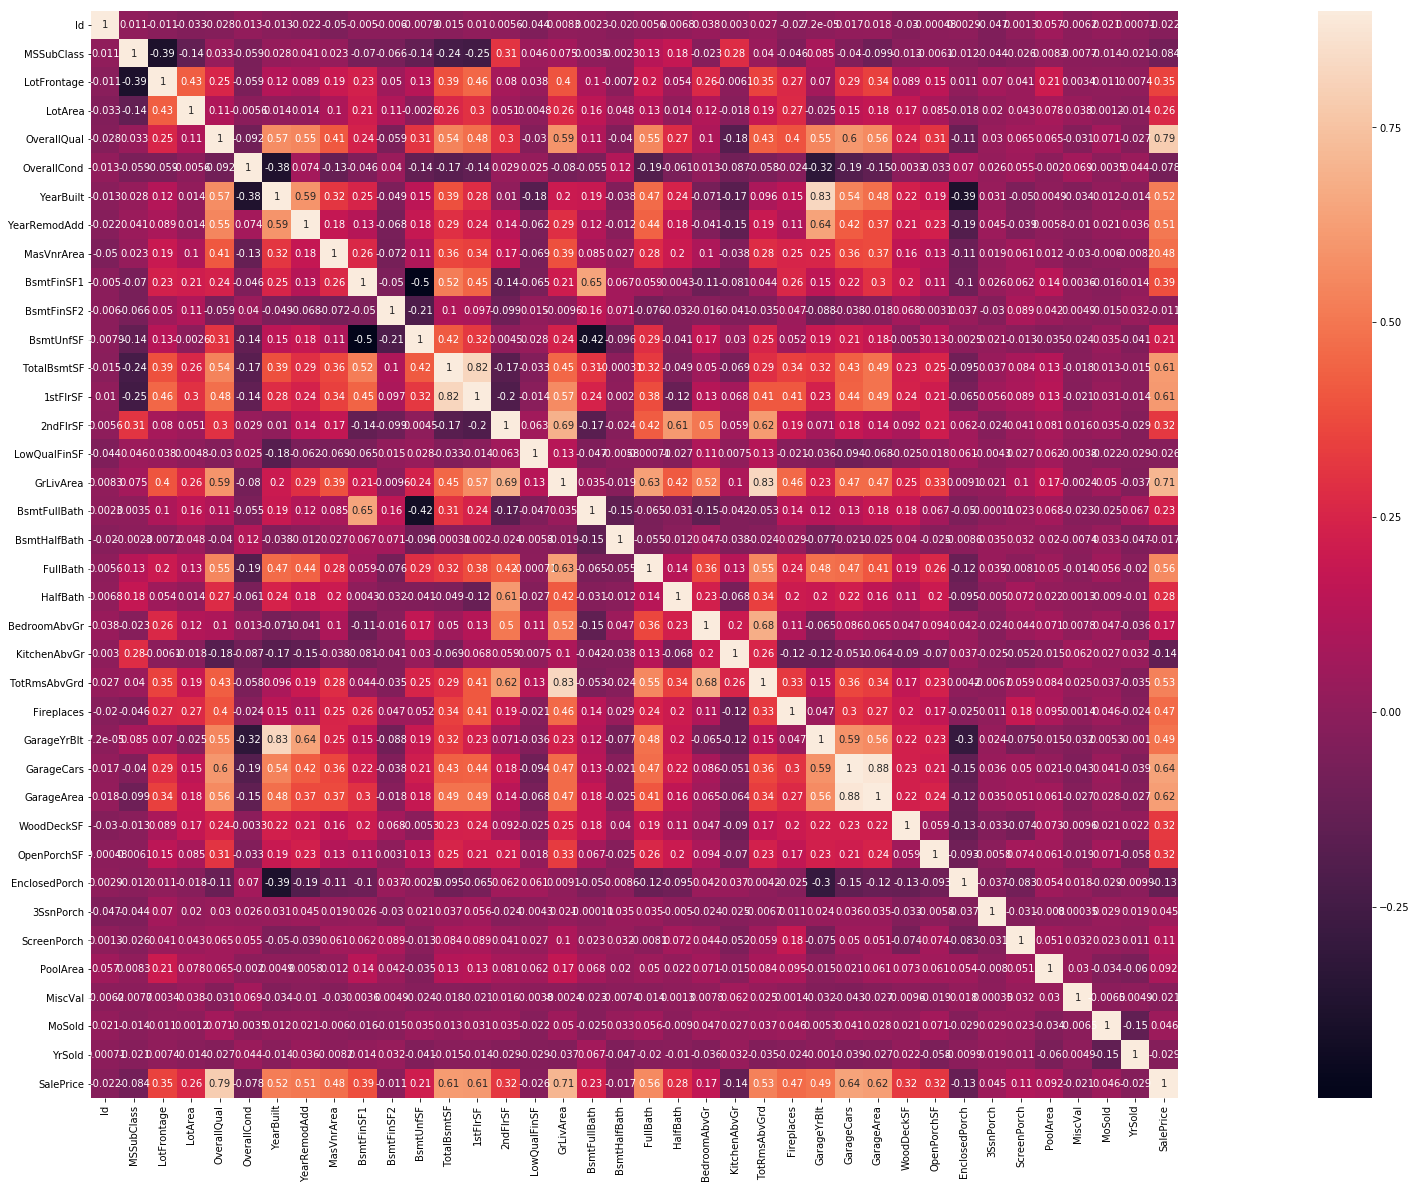

In [10]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [11]:
num_var =corrmat['SalePrice'].sort_values(ascending=False).head(10).to_frame()

num_var

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [12]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [13]:
df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)

In [14]:
#missing data
total = df_test.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78
GarageFinish,78


In [15]:
df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)

In [16]:
# fixing missing value for continuous variable
for col in ('LotFrontage','GarageYrBlt','GarageCars','BsmtFinSF1','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtUnfSF','LotFrontage','GarageYrBlt','BsmtFullBath','BsmtHalfBath'):
    df_train[col]=df_train[col].fillna(df_train[col].mean())
    df_test[col]=df_test[col].fillna(df_test[col].mean())

In [17]:
# fixing missing value for categorical
for col in ('BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical','Exterior2nd','Exterior1st','KitchenQual','Functional','SaleType','Utilities','MSZoning','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical'):
    df_test[col]=df_test[col].fillna(df_test[col].mode()[0])
    df_train[col]=df_train[col].fillna(df_train[col].mode()[0])

In [18]:
df_train.isnull().sum().max()

0

In [20]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
label_encoders = {}
for column in df_train.select_dtypes(include=[np.object]):
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column]) 


In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
label_encoders = {}
for column in df_test.select_dtypes(include=[np.object]):
    label_encoders[column] = LabelEncoder()
    df_test[column] = label_encoders[column].fit_transform(df_test[column]) 

In [22]:
x_train = df_train.drop('SalePrice', axis = 1)
y_train = df_train['SalePrice']

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lr.score(x_train,y_train)

0.8483599791226692

In [25]:
prediction = lr.predict(df_test)
lr.predict(df_test)

array([104160.28098714, 151520.33827509, 165601.55385075, ...,
       140298.41686448, 111593.21868022, 243382.06638452])

In [26]:
df_test.shape

(1459, 70)

In [27]:
df_train.shape

(1460, 71)

In [28]:
sub = {
    'Id' : df_test.Id.values,
    'SalePrice': prediction
}

submission = pd.DataFrame(sub)
submission.head()

,Id,SalePrice
0,1461,104160.280987
1,1462,151520.338275
2,1463,165601.553851
3,1464,183760.498024
4,1465,186924.500467


In [30]:
#make the submission file
submission.to_csv('submission.csv',index=False)